In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"grid.linestyle": "-"})

In [2]:
df=pd.read_csv(r"D:\CognoRise\cancer\data.csv")

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
numcol=df.select_dtypes('float64')

In [58]:
grp1=df.groupby('diagnosis').agg('mean')

In [52]:
grp1

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


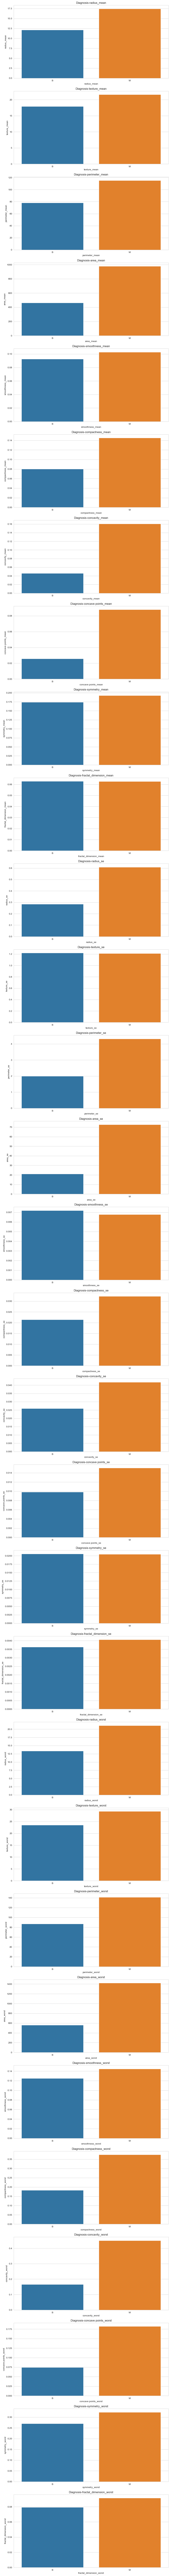

In [61]:
colm=grp1.columns
colm_len=len(colm)
plt.figure(figsize=(10,colm_len*5))
for i,col in enumerate(colm):
    plt.subplot(colm_len,1,i+1)
    plt.title(f'Diagnosis-{col}')
    sns.barplot(x=grp1.index,y=col,data=grp1)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### Ouliers

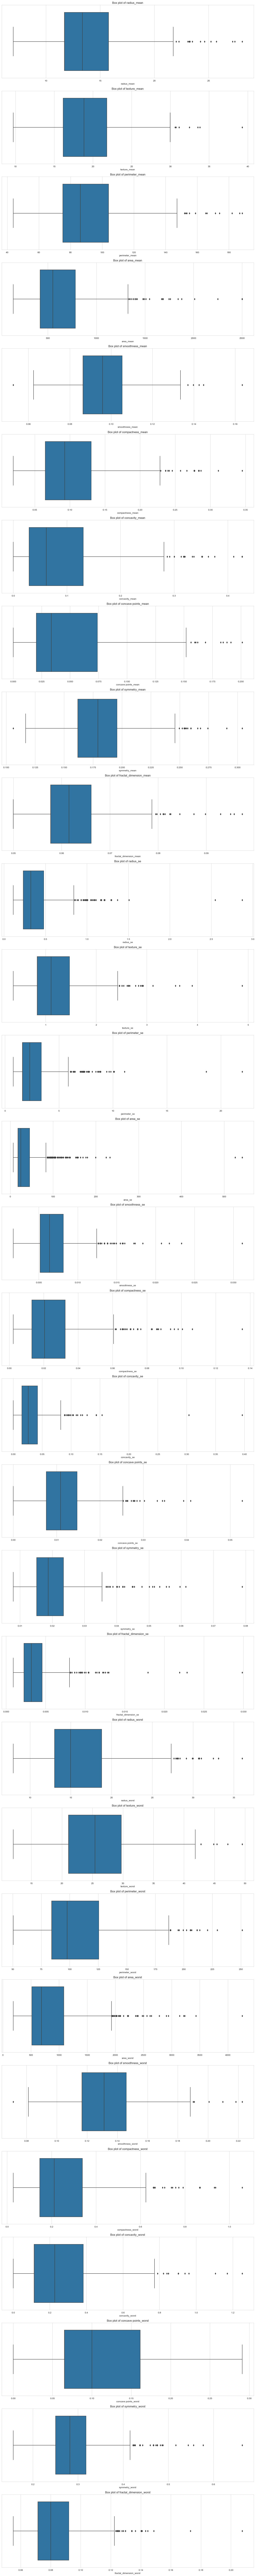

In [9]:
num_col = numcol.columns
num_plots = len(num_col)
plt.figure(figsize=(15, num_plots * 5))
for idx, col in enumerate(num_col):
    plt.subplot(num_plots, 1, idx + 1)
    sns.boxplot(x=numcol[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

## Transformation

### 1.Log

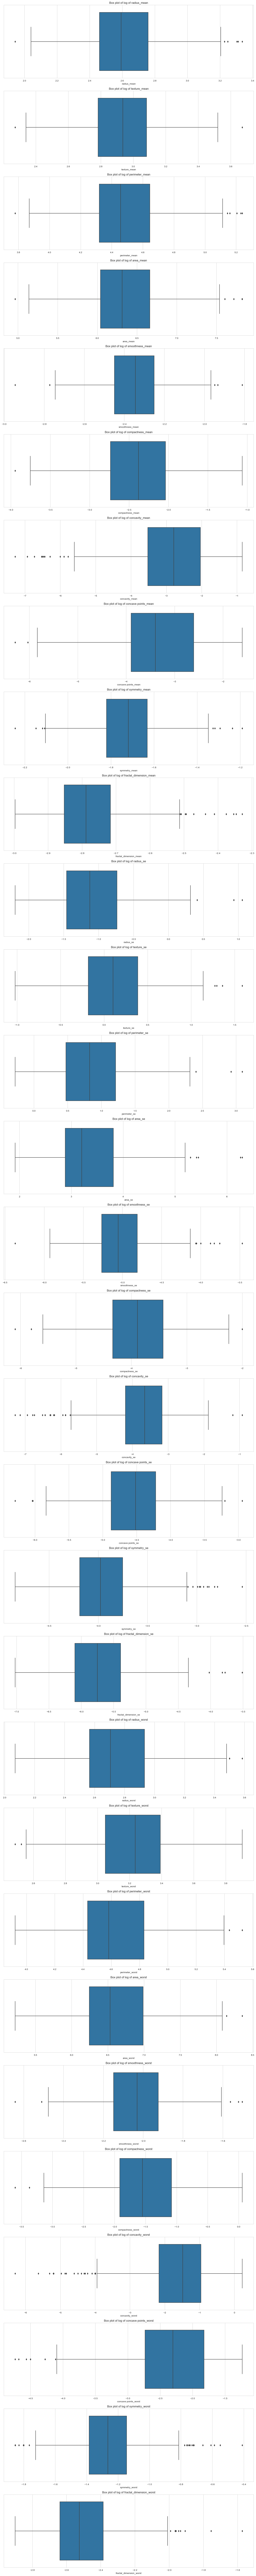

In [10]:
num_col = numcol.columns
num_plots = len(num_col)
plt.figure(figsize=(15, num_plots * 5))
for idx, col in enumerate(num_col):
    plt.subplot(num_plots, 1, idx + 1)
    sns.boxplot(x=np.log(numcol[col]))
    plt.title(f'Box plot of log of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### 2.Sqrt

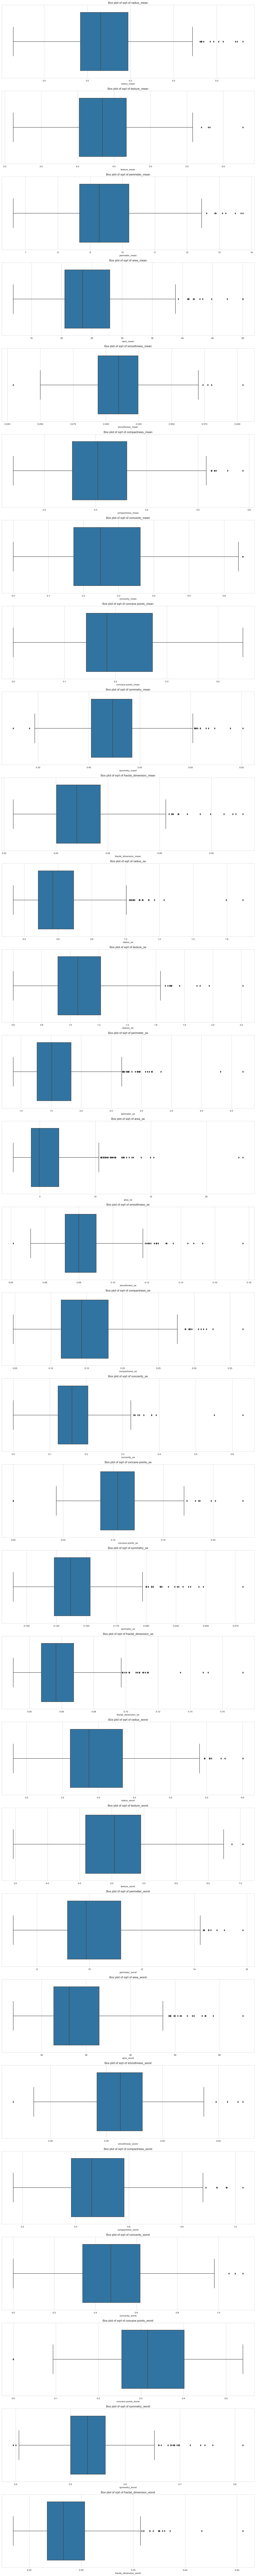

In [11]:
num_col = numcol.columns
num_plots = len(num_col)
plt.figure(figsize=(15, num_plots * 5))
for idx, col in enumerate(num_col):
    plt.subplot(num_plots, 1, idx + 1)
    sns.boxplot(x=np.sqrt(numcol[col]))
    plt.title(f'Box plot of sqrt of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

### 3.Cbrt

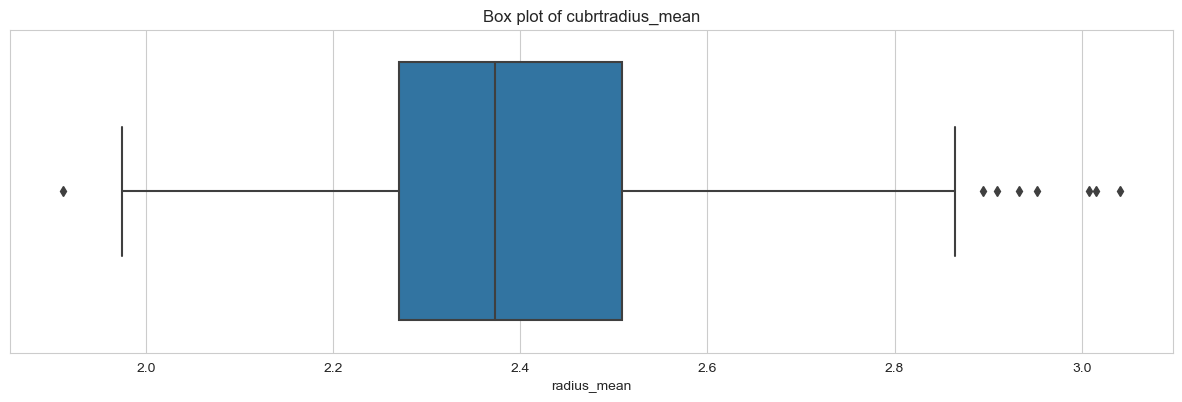

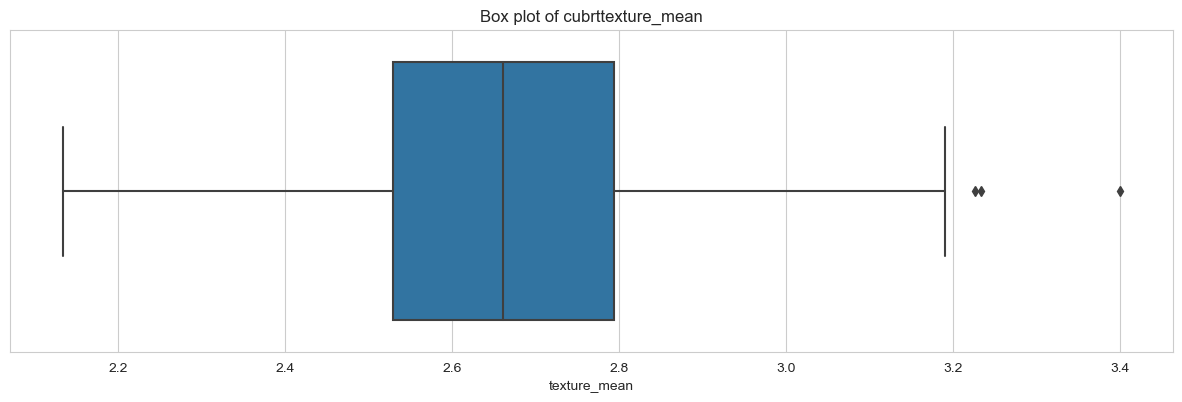

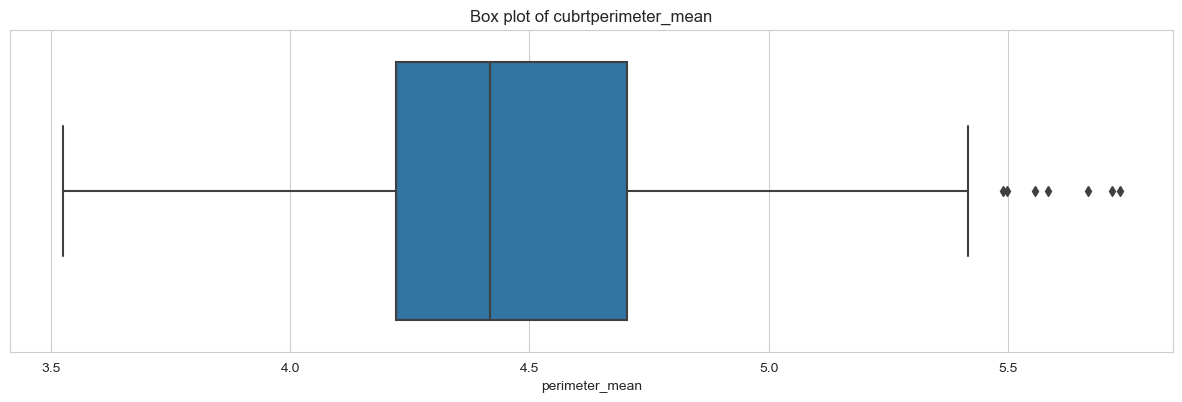

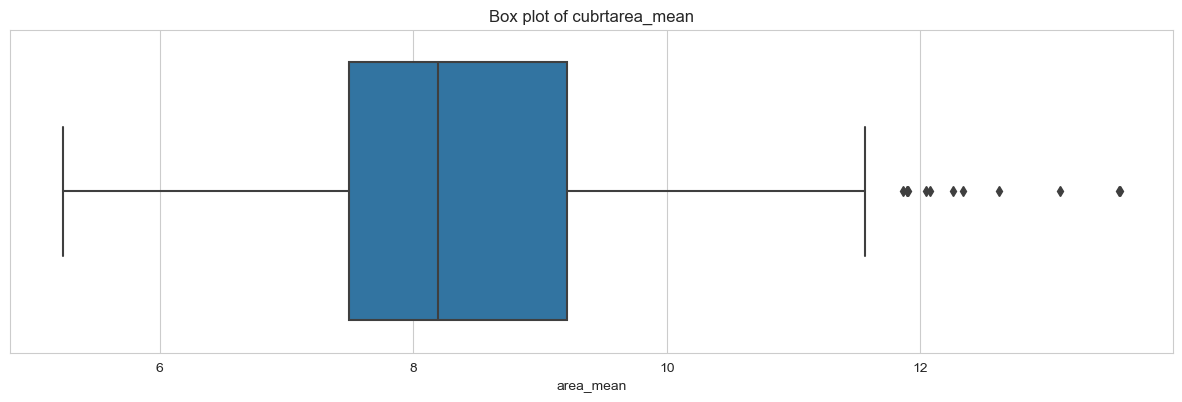

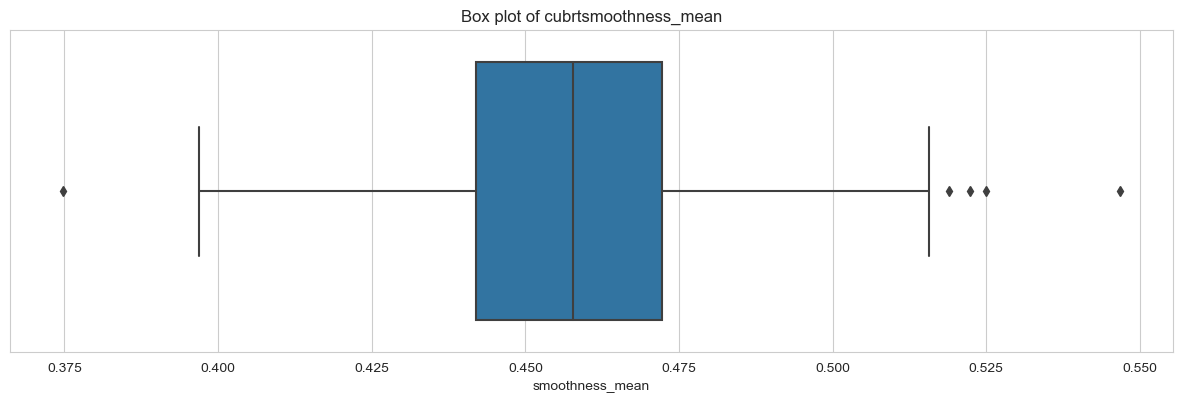

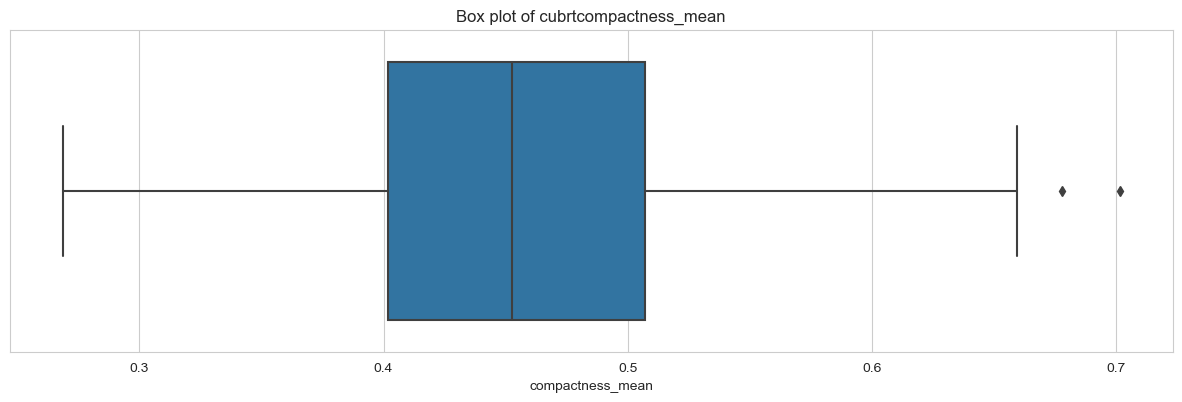

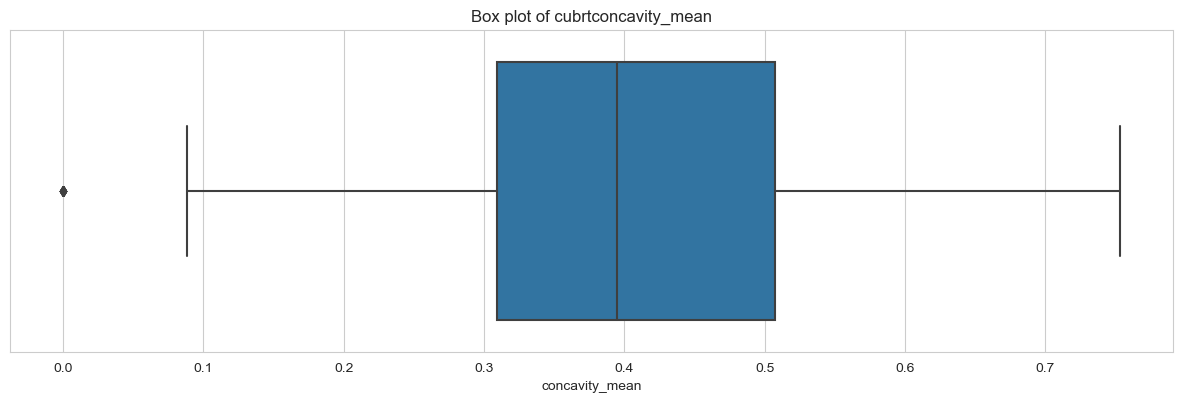

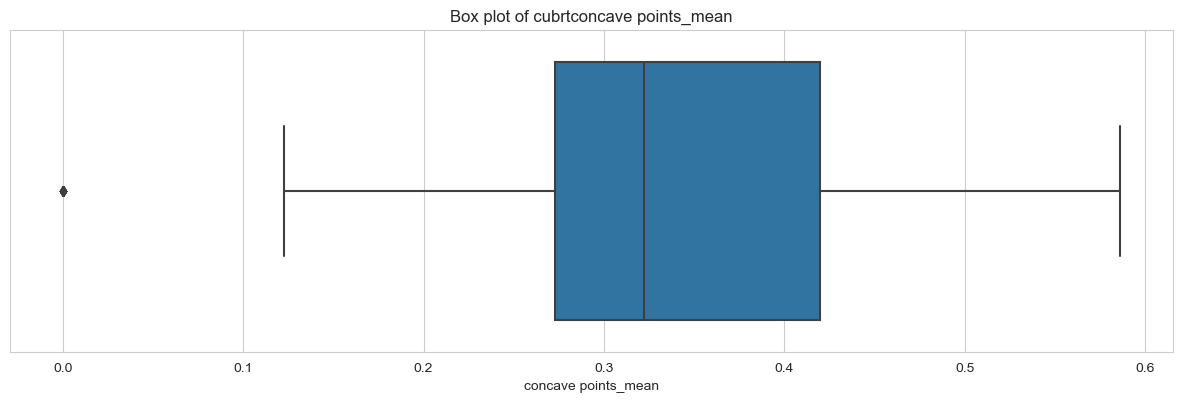

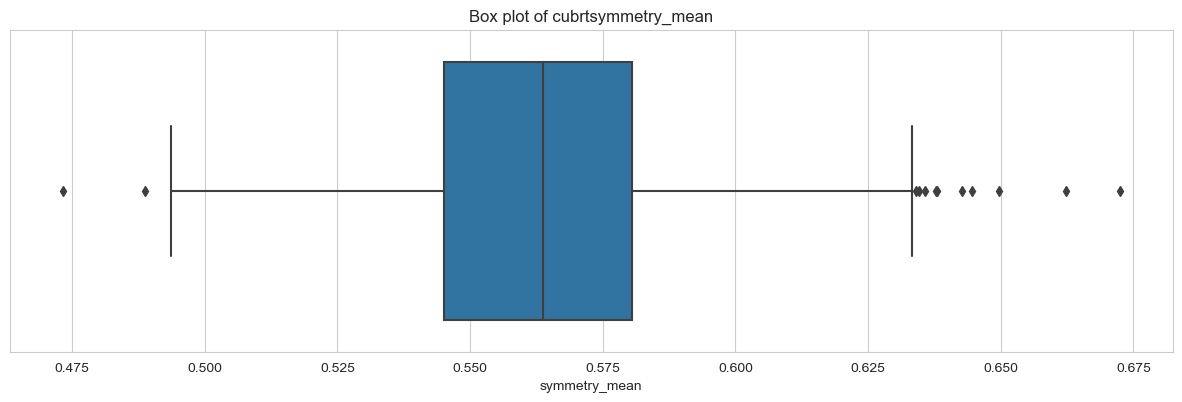

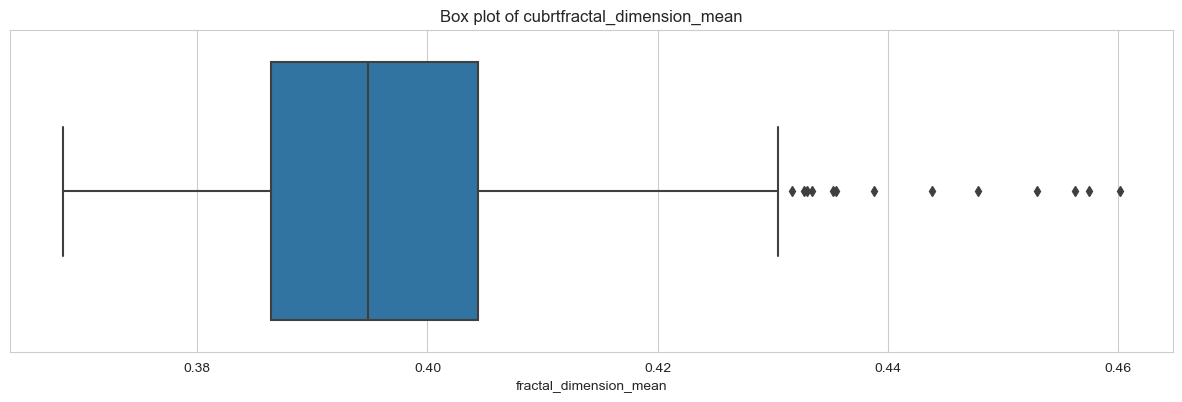

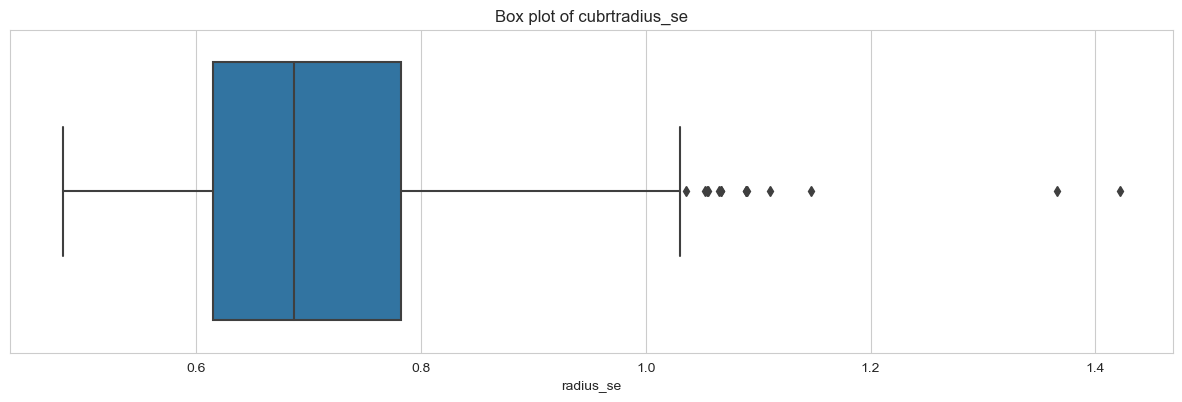

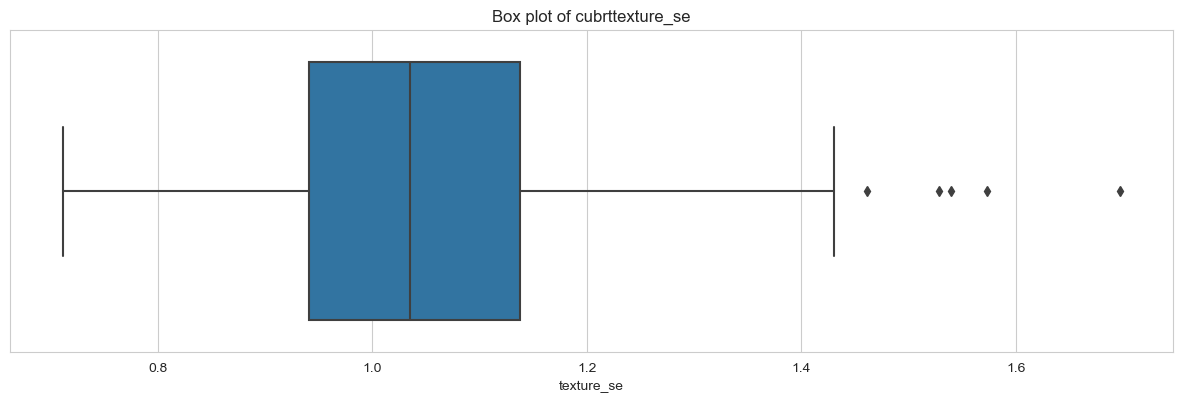

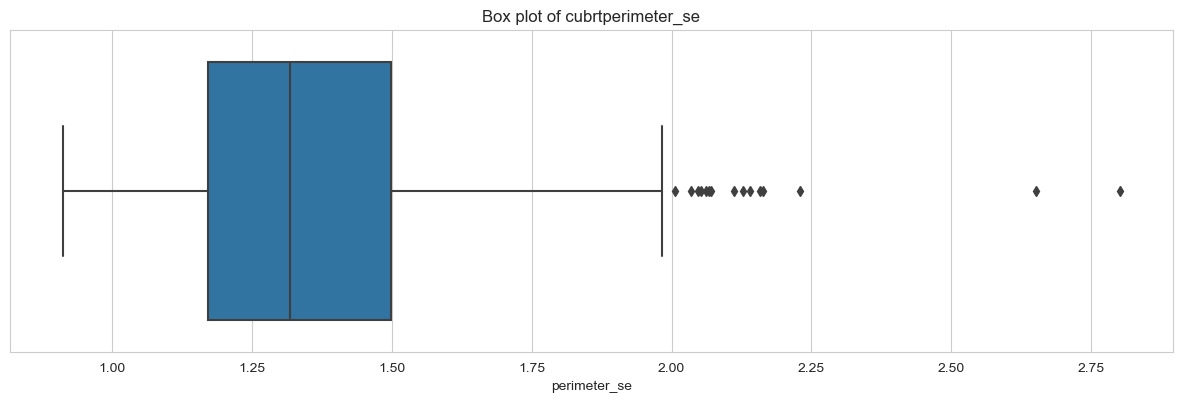

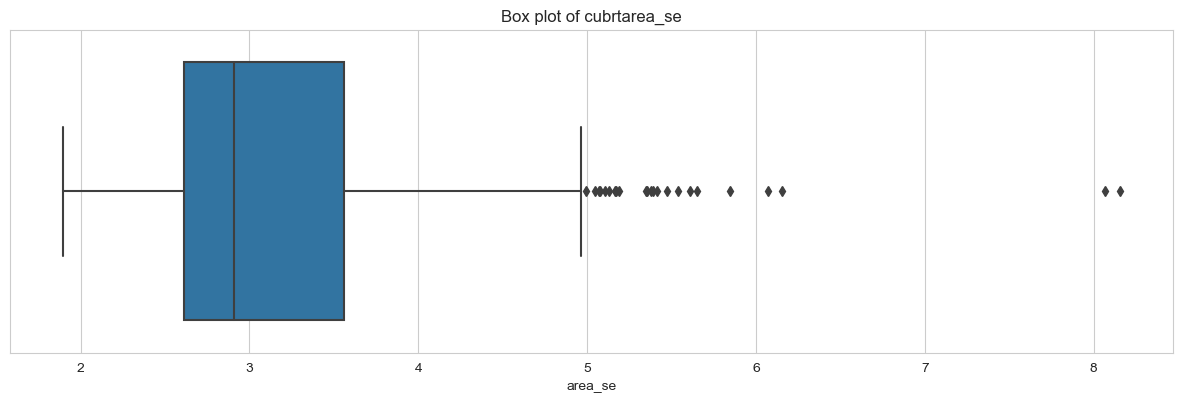

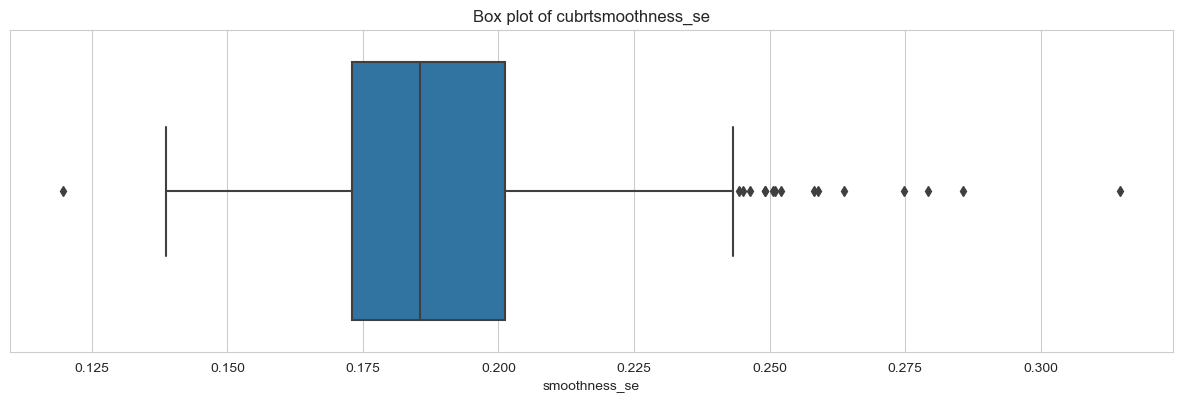

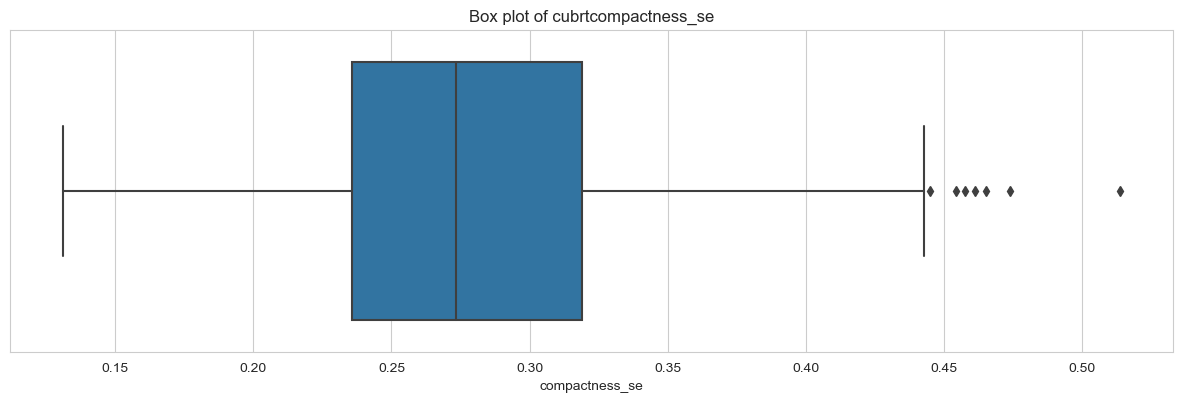

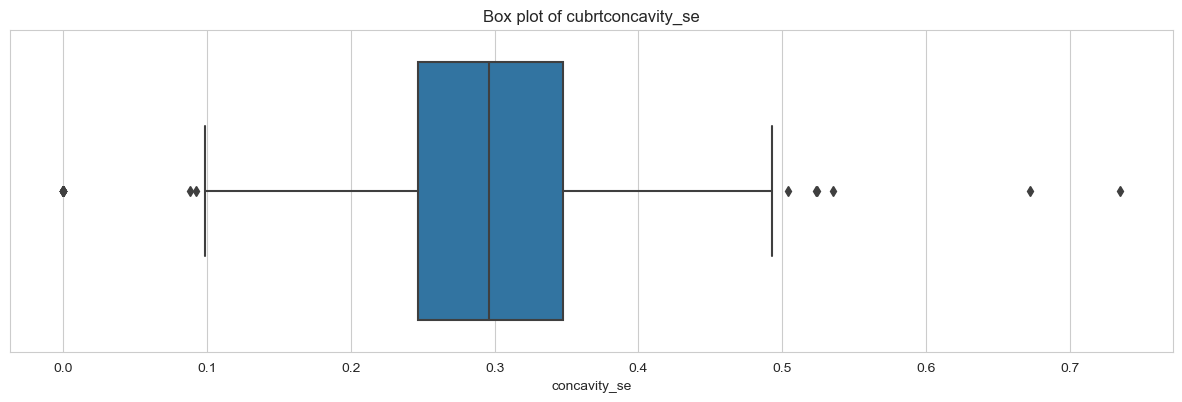

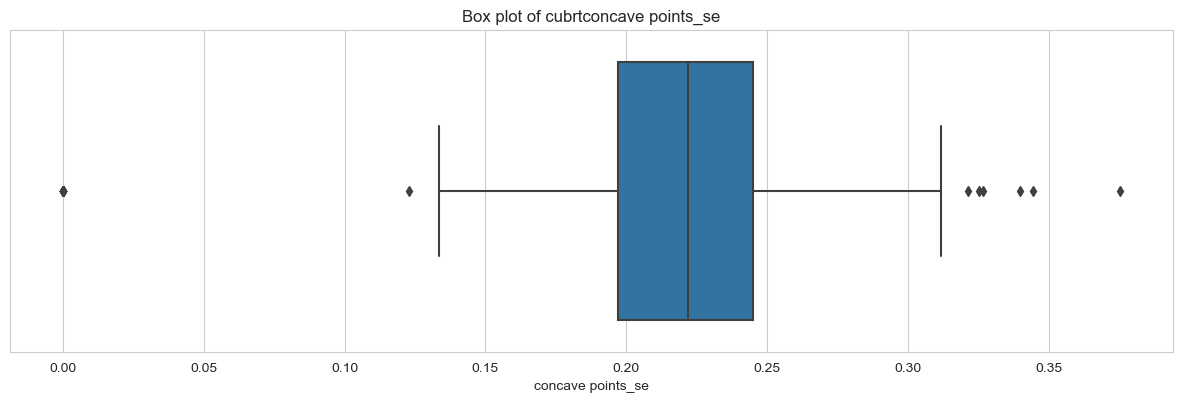

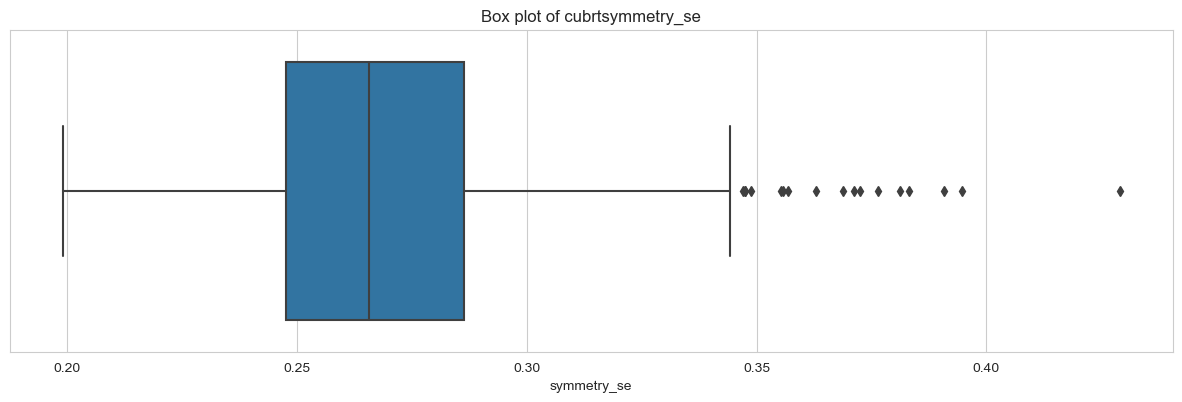

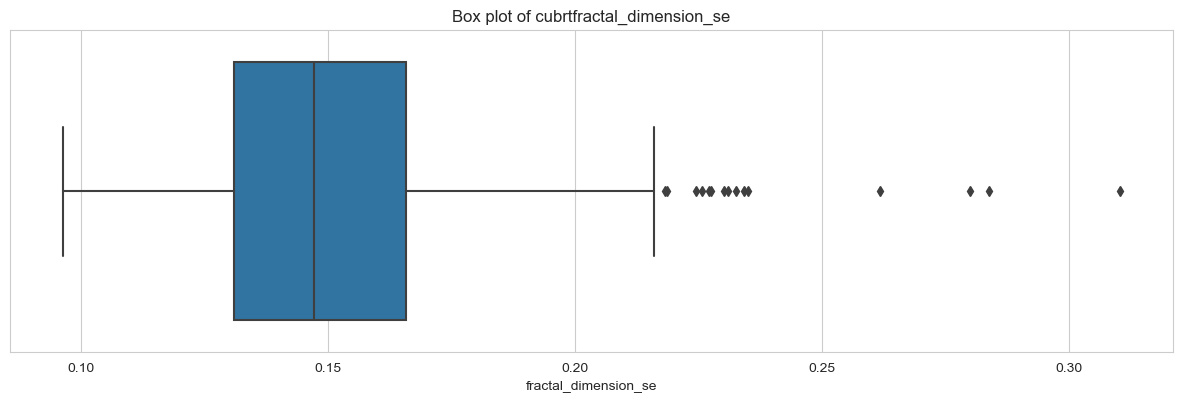

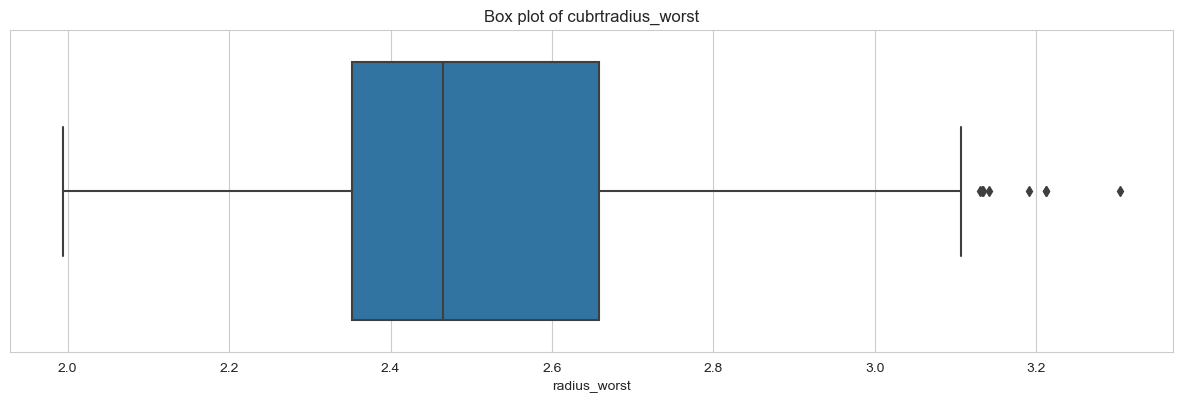

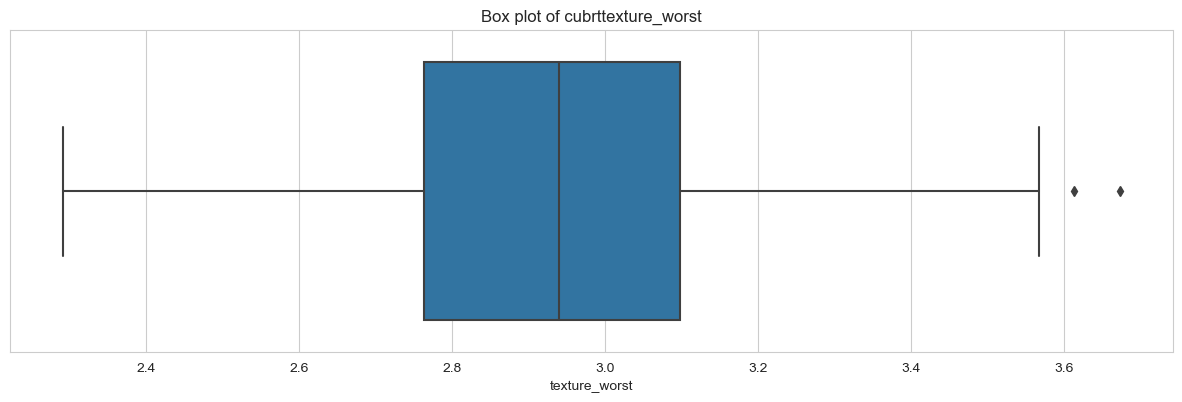

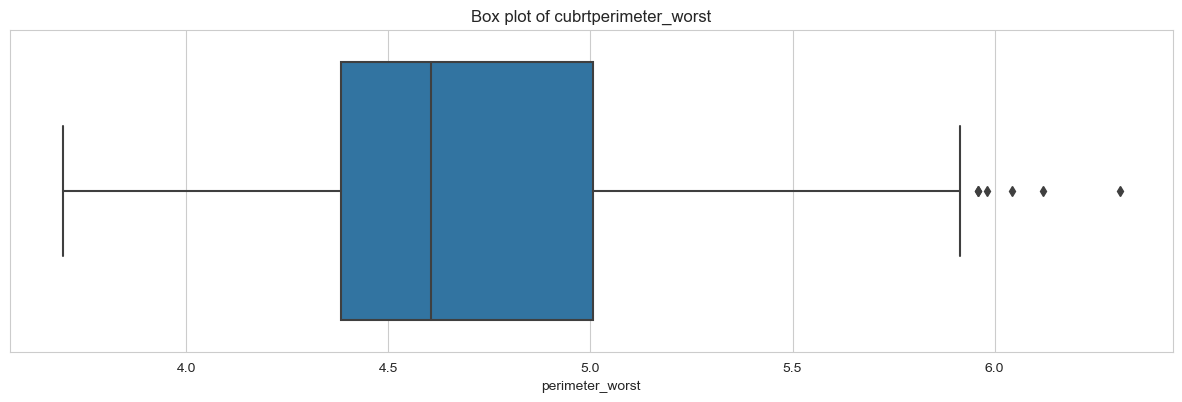

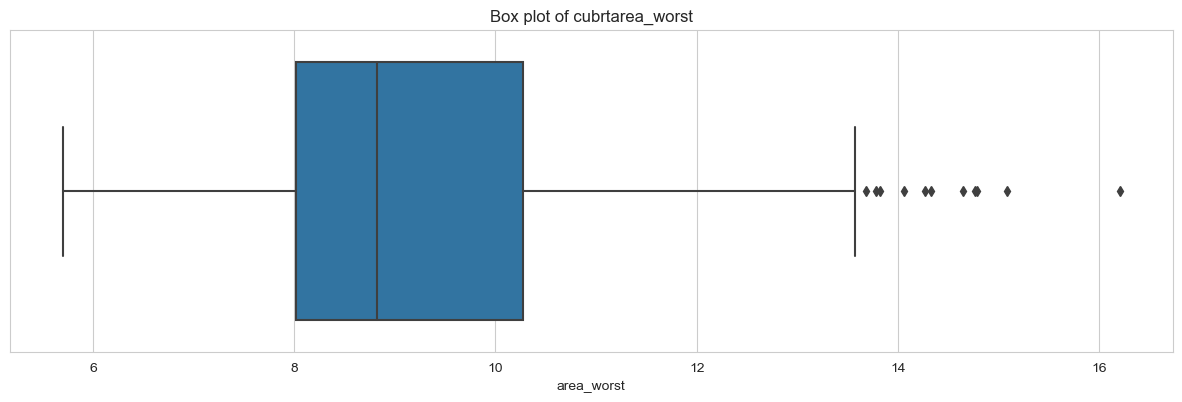

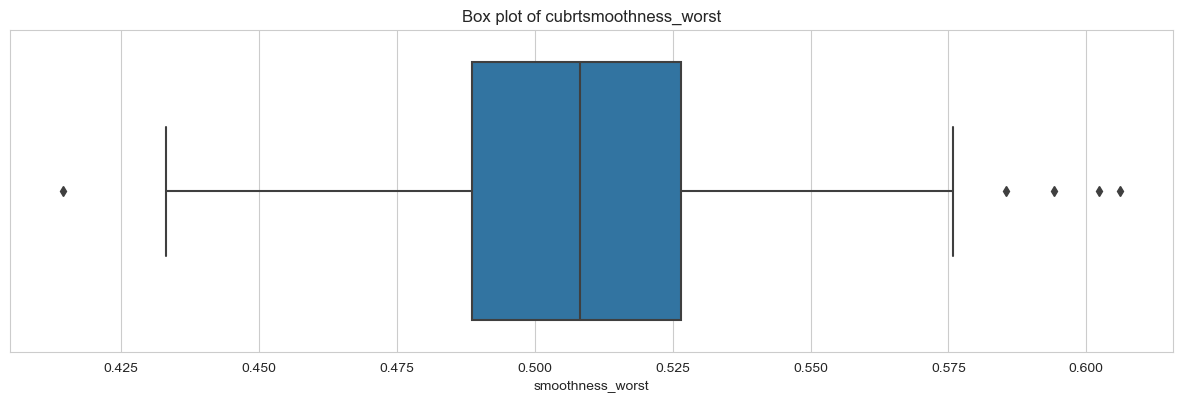

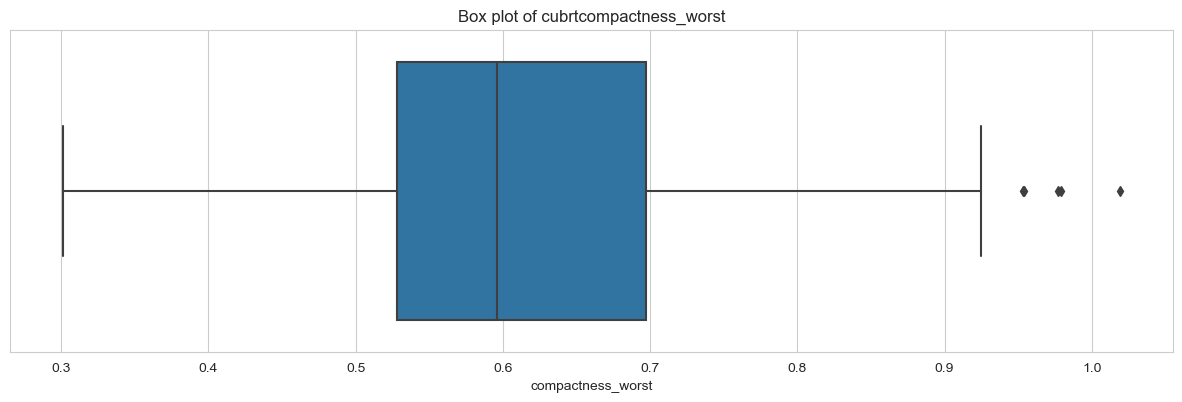

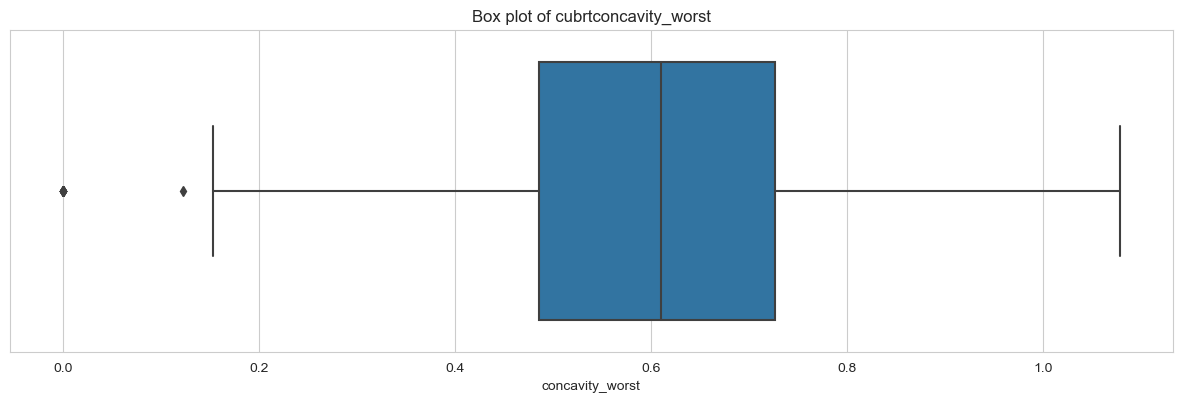

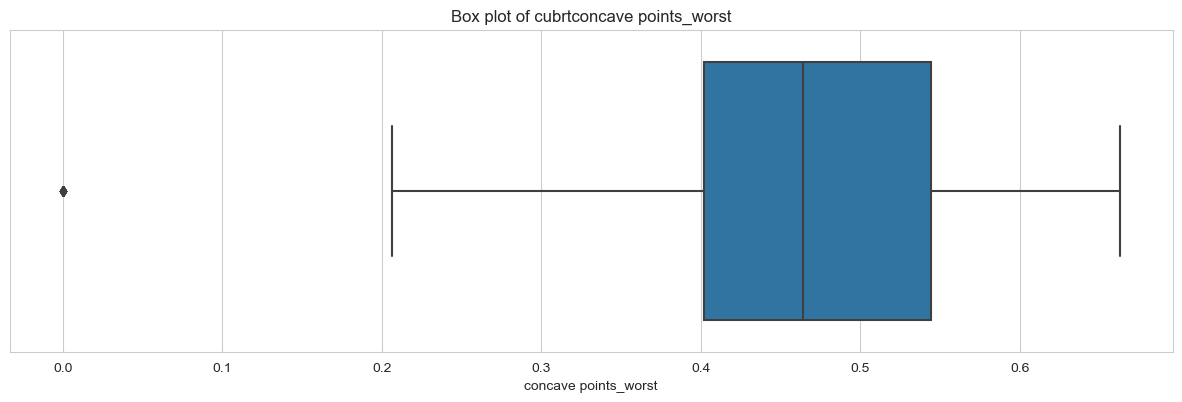

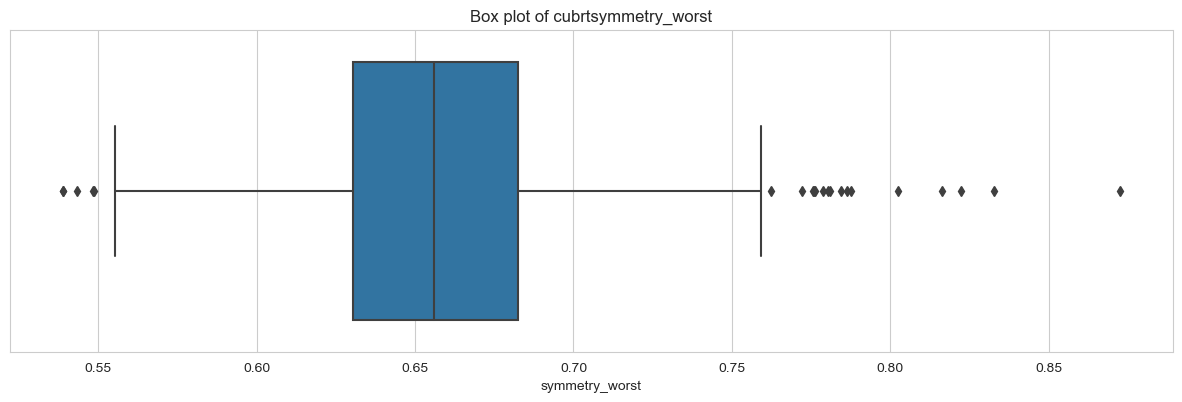

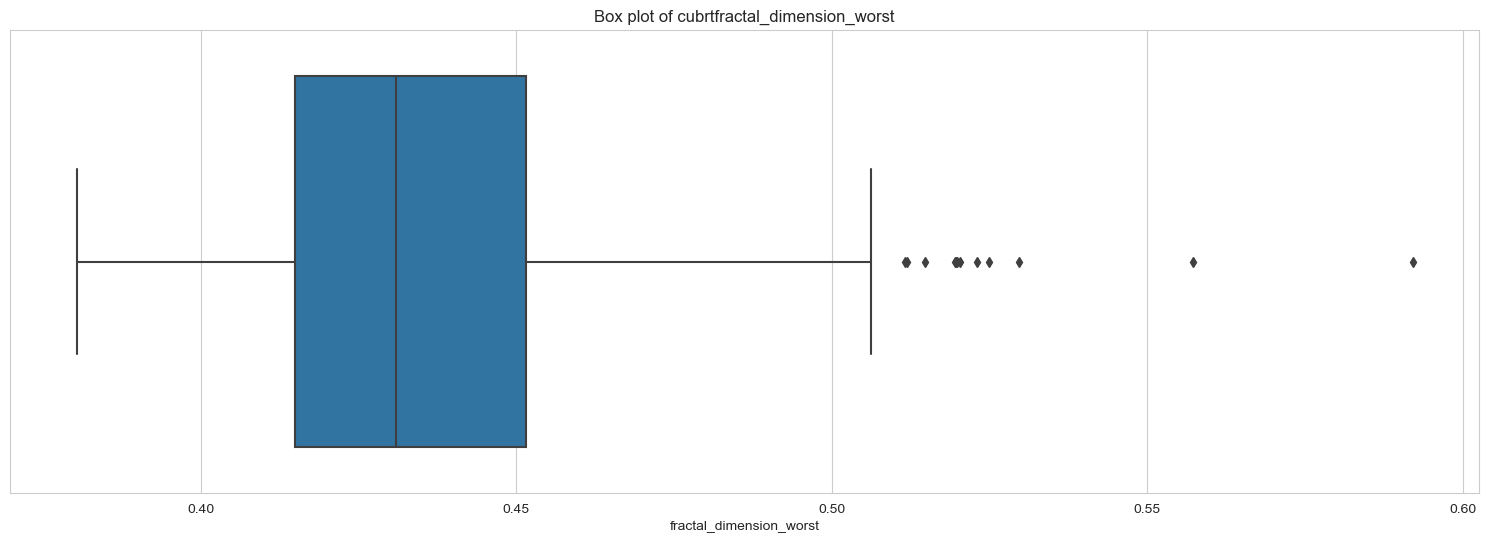

In [12]:
num_col=numcol.columns
num_plot=len(numcol.columns)
for idx,col in enumerate(num_col):
    plt.figure(figsize=(15,num_plot*5))
    plt.subplot(num_plot,1,idx+1)
    plt.title(f'Box plot of cubrt{col}')
    sns.boxplot(x=np.cbrt(numcol[col]))
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [13]:
df1=df.copy()

In [14]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = ((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)
df_no=df1[~outliers]

In [15]:
df_no

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


## Model Building

### Functions

In [17]:
features=df1.drop('diagnosis',axis=1)
target=df1['diagnosis']

In [18]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [19]:
index_columns = ['train_accuracy', 'train_precision', 'train_recall', 'train_f1score',
                'test_accuracy', 'test_precision', 'test_recall', 'test_f1score']
result=pd.DataFrame(index=index_columns)

In [20]:
def tuning(model,params):
    '''model,params,features'''
    grid=GridSearchCV(model,params,verbose=3)
    x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)
    grid.fit(x_train,y_train)
    bestp=grid.best_params_
    return bestp

In [21]:
def model_building(model,features1,model_name):
    '''model,features,model name'''
    
    x_train,x_test,y_train,y_test=train_test_split(features1,target,train_size=0.8,random_state=100)
    
    model1=model.fit(x_train,y_train)
    train_predict=model1.predict(x_train)
    train_conf=confusion_matrix(y_train,train_predict)
    train_classfi=classification_report(y_train,train_predict)
    train_accuracy=accuracy_score(y_train,train_predict)
    train_precision=precision_score(y_train,train_predict,average='macro')
    train_recall=recall_score(y_train,train_predict,average='macro')
    train_f1score=f1_score(y_train,train_predict,average='macro')
    
    test_predict=model1.predict(x_test)
    test_conf=confusion_matrix(y_test,test_predict)
    test_classfi=classification_report(y_test,test_predict)
    test_accuracy=accuracy_score(y_test,test_predict)
    test_precision=precision_score(y_test,test_predict,average='macro')
    test_recall=recall_score(y_test,test_predict,average='macro')
    test_f1score=f1_score(y_test,test_predict,average='macro')
    
    result[model_name]=train_accuracy,train_precision,train_recall,train_f1score,test_accuracy,test_precision,test_recall,test_f1score
    
    plt.figure(figsize=(5,3))
    sns.heatmap(test_conf,annot=True)
    plt.show()
    print('-'*30,'>','Train Classification Report','<','-'*30)
    print(train_classfi)
    print()
    print('-'*30,'>','Test Classification Report','<','-'*30)
    print(test_classfi)
    

## 1 Decision Tree Feature Selection


In [22]:
param_grid = {
    'max_depth': [None, 10, 20, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [23]:
#tuning(DecisionTreeClassifier(),param_grid)

In [24]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)
i,j=model.feature_importances_,model.feature_names_in_
featdf=pd.DataFrame(i,j)

<Axes: >

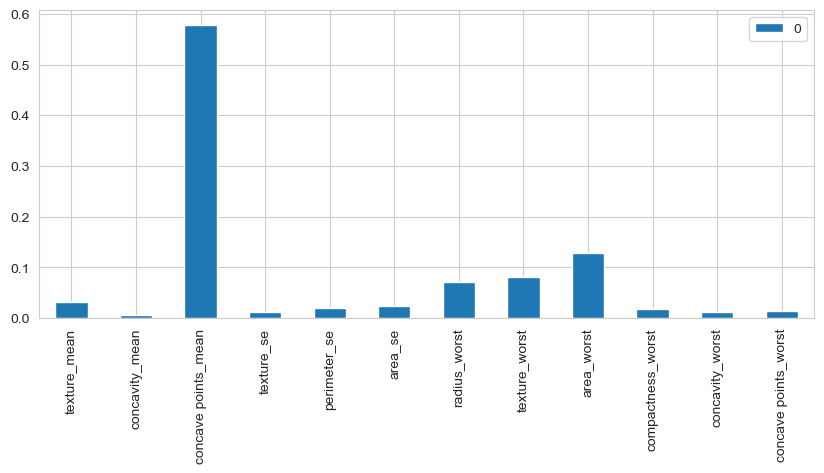

In [43]:
featdf[featdf[0]!=0].plot(kind='bar',figsize=(10,4))

In [26]:
dtree_feat=featdf[featdf[0]!=0].index

In [27]:
features2=df[dtree_feat]

### Decision Tree with all features

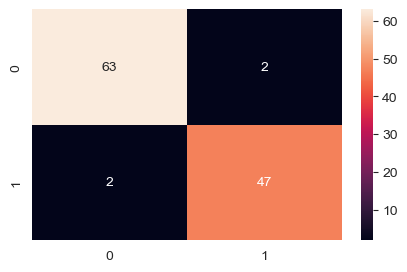

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       292
           M       1.00      1.00      1.00       163

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        65
           M       0.96      0.96      0.96        49

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [28]:
model_building(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=2),features,'DecisionTree1')

### Decision Tree with Selected Features

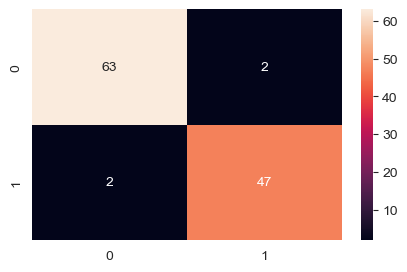

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       1.00      1.00      1.00       292
           M       1.00      1.00      1.00       163

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.97      0.97      0.97        65
           M       0.96      0.96      0.96        49

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [29]:
model_building(DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,min_samples_split=2),features2,'DecisionTree2')

## 2.RandomForest Feature Selection

In [30]:
params2={'n_estimators':[50,100,150],'max_depth':[2,8,10,20,None],'criterion':['entropy','gini'],'max_features':[0.25,0.5,1.0,None,'sqrt','log2'],'min_samples_split':[2,5,7]}

In [31]:
#tuning(RandomForestClassifier(),params2)

In [32]:
model_2=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=5,max_features=0.25,n_estimators=50).fit(x_train,y_train)
i,j=model.feature_importances_,model.feature_names_in_
featdf=pd.DataFrame(i,j)
rafor_feat=featdf[featdf[0]!=0].index

In [33]:
features3=df1[rafor_feat]

<Axes: >

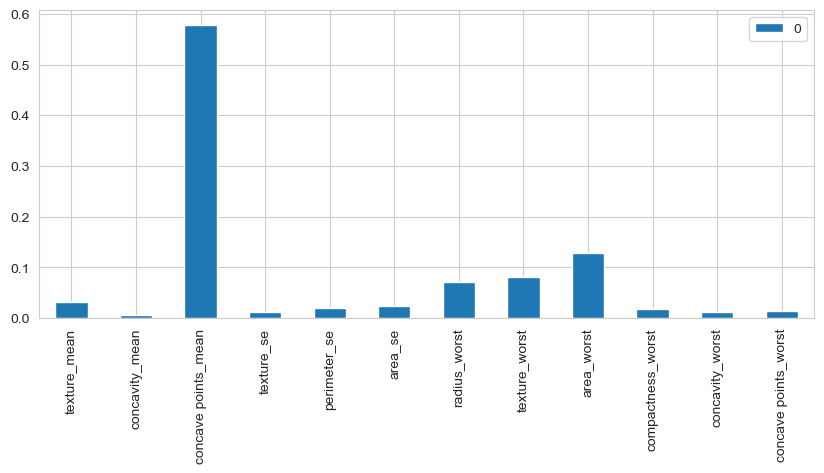

In [44]:
featdf[featdf[0]!=0].plot(kind='bar',figsize=(10,4))

### RandomForest with selected Features

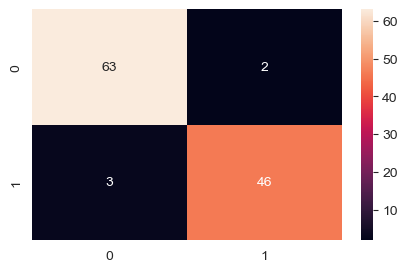

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       292
           M       1.00      0.99      0.99       163

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.95      0.97      0.96        65
           M       0.96      0.94      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.96       114
weighted avg       0.96      0.96      0.96       114



In [35]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=5,max_features=0.25,n_estimators=50),features3,'Randomforest2')

### RandomForest with all features

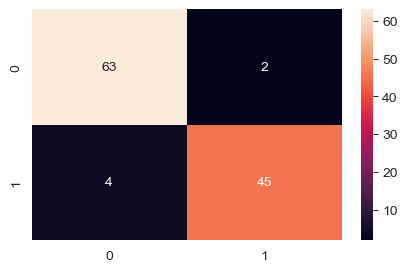

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.99      1.00      1.00       292
           M       1.00      0.99      0.99       163

    accuracy                           1.00       455
   macro avg       1.00      0.99      1.00       455
weighted avg       1.00      1.00      1.00       455


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.94      0.97      0.95        65
           M       0.96      0.92      0.94        49

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



In [36]:
model_building(RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_split=5,max_features=0.25,n_estimators=50),features,'Randomforest1')

### Logistic Regression

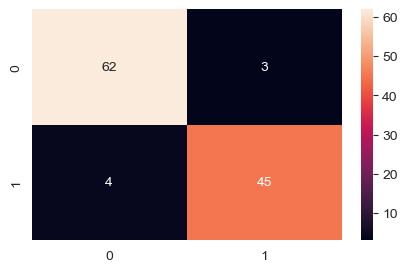

------------------------------ > Train Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.96      0.97      0.96       292
           M       0.95      0.92      0.93       163

    accuracy                           0.95       455
   macro avg       0.95      0.95      0.95       455
weighted avg       0.95      0.95      0.95       455


------------------------------ > Test Classification Report < ------------------------------
              precision    recall  f1-score   support

           B       0.94      0.95      0.95        65
           M       0.94      0.92      0.93        49

    accuracy                           0.94       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



In [46]:
model_building(LogisticRegression(),features,'Logistic Regression')

In [47]:
result

,DecisionTree1,DecisionTree2,Randomforest2,Randomforest1,Logistic Regression
train_accuracy,1.000000,1.000000,0.995604,0.995604,0.953846
train_precision,1.000000,1.000000,0.996599,0.996599,0.952798
train_recall,1.000000,1.000000,0.993865,0.993865,0.946424
train_f1score,1.000000,1.000000,0.995207,0.995207,0.949463
test_accuracy,0.964912,0.964912,0.956140,0.947368,0.938596
test_precision,0.964207,0.964207,0.956439,0.948873,0.938447
test_recall,0.964207,0.964207,0.954003,0.943799,0.936107
test_f1score,0.964207,0.964207,0.955143,0.946023,0.937200
